In [35]:
from matplotlib import cm
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [36]:
digits = datasets.load_digits() # 手写数字数据集
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=666) # 多分类问题

In [37]:
log_reg = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9381084840055632

In [38]:
y_predict = log_reg.predict(X_test)
y_predict

array([8, 1, 3, ..., 1, 0, 3])

In [39]:
from sklearn.metrics import precision_score
precision_score(y_test, y_predict, average="micro") # 多分类问题的(微)查准率P

0.9381084840055632

In [40]:
from sklearn.metrics import  recall_score
recall_score(y_test, y_predict, average='macro') # 多分类问题的(宏)召回率R

0.9382566121383997

In [41]:
from sklearn.metrics import  f1_score
f1_score(y_test, y_predict, average='micro') # 多分类问题的F1

0.9381084840055631

In [42]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict) # 多分类问题的混淆矩阵

array([[148,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0, 122,   2,   1,   0,   0,   1,   4,   1,  12],
       [  0,   1, 134,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   2, 139,   0,   4,   0,   1,   2,   1],
       [  1,   3,   0,   0, 141,   0,   1,   3,   0,   1],
       [  1,   4,   1,   0,   0, 144,   1,   0,   0,   1],
       [  1,   2,   0,   0,   0,   1, 132,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 135,   0,   1],
       [  0,   8,   3,   2,   4,   4,   0,   1, 116,   2],
       [  0,   0,   0,   7,   0,   1,   0,   1,   0, 138]], dtype=int64)

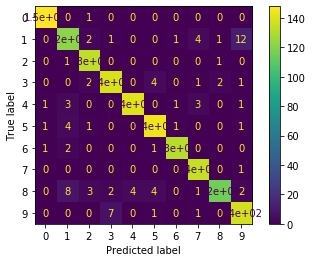

In [43]:
# sklearn包实现
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_reg, X_test, y_test)

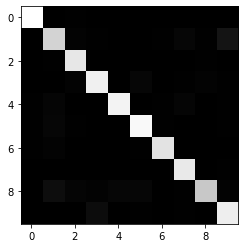

In [44]:
# 手工绘制实现
cfm = confusion_matrix(y_test, y_predict)
fig, ax = plt.subplots()
ax.imshow(cfm, cmap=cm.gray)
plt.show()

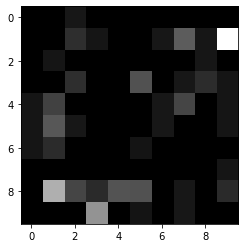

In [45]:
row_sums = np.sum(cfm, axis=1) # 行和
err_matrix = cfm / row_sums
np.fill_diagonal(err_matrix, 0) # 使对角线元素为0

# 越亮的区域,代表预测错误较多
plt.imshow(err_matrix, cmap=cm.gray) # 可以看出很多1被错误地预测为9,很多8被错误地预测为1 
plt.show()